In [2]:
import torch
from torch import nn
import numpy as np
import helper
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets, transforms

In [3]:
# Loadintg Data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5)),])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


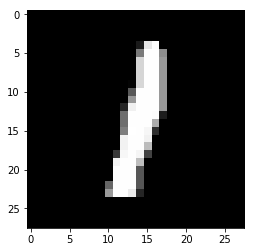

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

# for i in images:
#     plt.imshow(i.numpy().squeeze(), cmap="Greys_r")
#     plt.k

plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r")

In [5]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

In [6]:
print(images.shape)

inputs = images.reshape(images.shape[0], -1) # confused bout this line????
print(inputs.shape)
# Parameters

n_input = 784
n_hidden_layer = 256
n_outputs = 10

w1 = torch.randn(n_input, n_hidden_layer)
w2 = torch.randn(n_hidden_layer, n_outputs)

b1 = torch.randn(n_hidden_layer)
b2 = torch.randn(n_outputs)

hidden_layer = sigmoid(torch.add(torch.mm(inputs, w1), b1))

output_layer = sigmoid(torch.add(torch.mm(hidden_layer, w2), b2))

output_layer.shape

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


torch.Size([64, 10])

In [7]:
def softmax(x):
    # print(torch.exp(x))
    # print(torch.sum(torch.exp(x), dim=1).view(-1, 1))
    
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view((-1, 1))

probabilities = softmax(output_layer)
print(probabilities.shape)

torch.Size([64, 10])


In [8]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_layer_1 = nn.Linear(784, 128)
        self.hidden_layer_2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = nn.ReLU(x)
        
        x = self.hidden_layer_2(x)
        x = nn.ReLU(x)
        
        x = self.output(x)
        x = nn.Softmax(x)
        
        return x